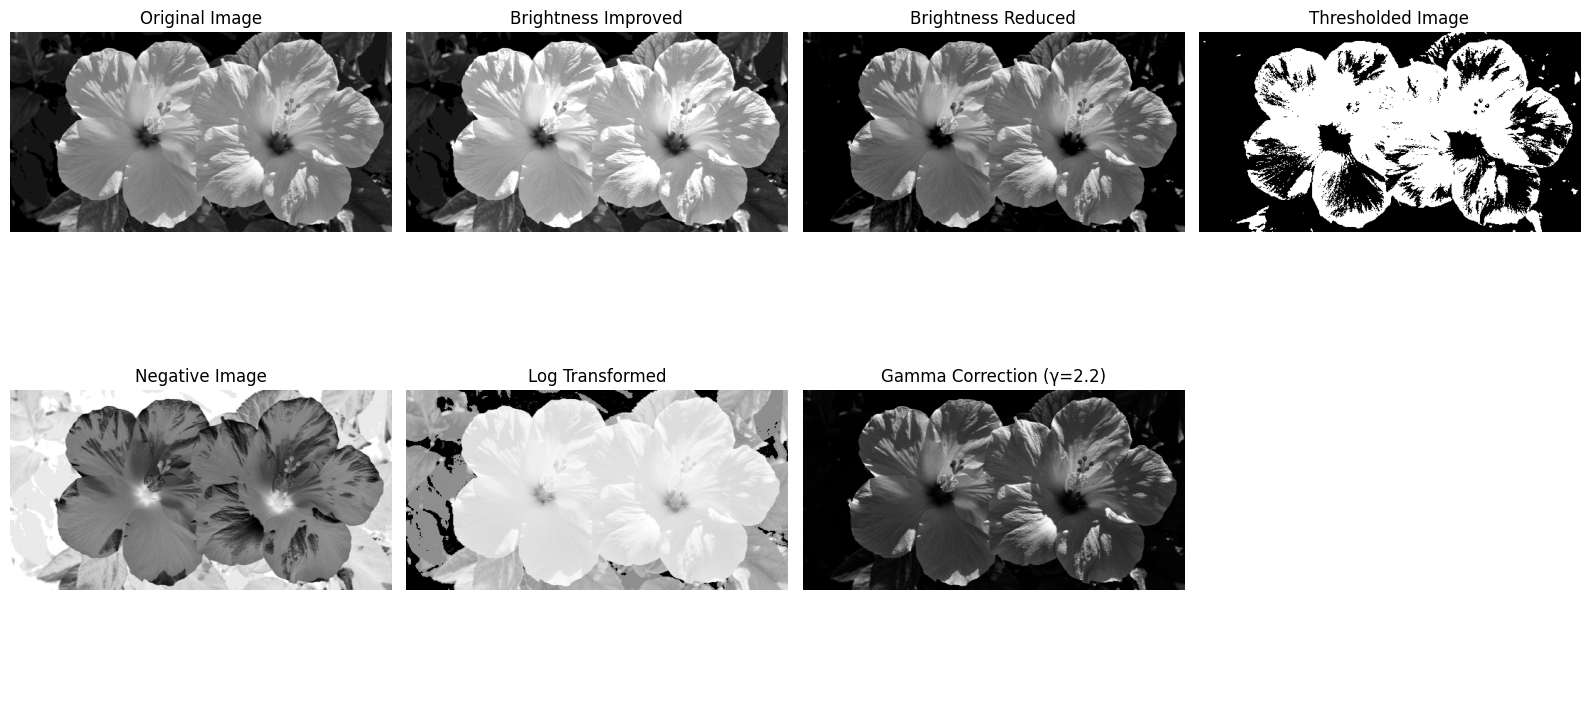

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load image
image = cv2.imread('C:/Users/ROUCHI/Pictures/flower.png', cv2.IMREAD_GRAYSCALE)

# Processed images
bright_image = cv2.add(image, 50)
dark_image = cv2.subtract(image, 50)
_, threshold_image = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)
negative_image = 255 - image

# Log transformation
image_float = image.astype(float)
log_image = np.log1p(image_float)
log_image = (255 / np.log(1 + np.max(image_float))) * log_image
log_image = np.array(log_image, dtype=np.uint8)

# Gamma correction
gamma = 2.2
image_normalized = image / 255.0
gamma_corrected = np.power(image_normalized, gamma)
gamma_corrected = np.uint8(gamma_corrected * 255)

# Titles and images
titles = [
    'Original Image', 'Brightness Improved', 'Brightness Reduced',
    'Thresholded Image', 'Negative Image', 'Log Transformed', f'Gamma Correction (γ={gamma})'
]
images = [
    image, bright_image, dark_image,
    threshold_image, negative_image, log_image, gamma_corrected
]

# Plot all images in a single output cell
fig, axes = plt.subplots(2, 4, figsize=(16, 8))
axes = axes.flatten()

for i in range(len(images)):
    axes[i].imshow(images[i], cmap='gray')
    axes[i].set_title(titles[i])
    axes[i].axis('off')

# Hide the last subplot if not used
for j in range(len(images), len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()